# NeuralNet - Visualizer

## A Python Module for Visualizing Neural Network Architectures

NeuralNet-Visualizer is a powerful Python module for representing and visualizing custom neural network architectures. It provides a flexible class structure to model sequential networks as well as multi-head, multi-input, and skip connection topologies with highly customizable visualizations.

![NeuralNet-Visualizer Showcase](src/readme_image_static/showcase.png)

### Usage & Attribution

This project is open source and free to use. If you use NeuralNet-Visualizer in your work, please provide appropriate credit by citing this repository.

---

## Installation

Clone the repository and install the required dependencies:

```bash
git clone https://github.com/Matteodambr/NeuralNet-Visualizer.git
cd NeuralNet-Visualizer
pip install matplotlib
```

---

## Step 1: Basic Setup

First, let's import the necessary modules. The library consists of two main components:
- `NN_DEFINITION_UTILITIES`: Classes for defining neural network structures
- `NN_PLOTTING_UTILITIES`: Functions and classes for visualization

In [1]:
import sys
import os

# Add the src directory to the path
sys.path.insert(0, os.path.join(os.getcwd(), 'src'))

# Import the main components
from NN_DEFINITION_UTILITIES import NeuralNetwork, FullyConnectedLayer, VectorInput
from NN_PLOTTING_UTILITIES import plot_network, PlotConfig, LayerGroup, LayerStyle

# Configure matplotlib for inline display
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

print("✓ All modules imported successfully!")

✓ All modules imported successfully!


---

## Step 2: Creating a Simple Network

Let's start by creating a basic feedforward neural network with an input layer, hidden layer, and output layer.

**Layer Types:**
- **`VectorInput`**: For input layers - automatically treated as root layers (no parents needed)
- **`FullyConnectedLayer`**: For hidden and output layers with optional activation functions

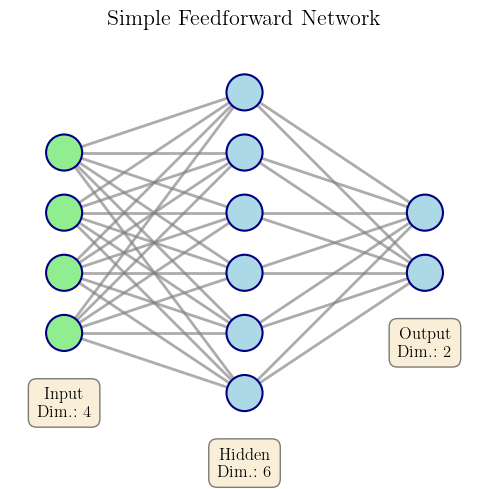

In [2]:
# Create a simple feedforward network
simple_nn = NeuralNetwork("Simple Feedforward Network")

# Add layers sequentially
# VectorInput is for input layers - automatically treated as a root layer
simple_nn.add_layer(VectorInput(num_features=4, name="Input"))
simple_nn.add_layer(FullyConnectedLayer(num_neurons=6, activation="relu", name="Hidden"))
simple_nn.add_layer(FullyConnectedLayer(num_neurons=2, activation="softmax", name="Output"))

# Plot the network
fig = plot_network(
    simple_nn, 
    title="Simple Feedforward Network",
    show=True,
    config=PlotConfig(figsize=(8, 5))
)

---

## Step 3: Multi-Input and Multi-Output Networks

The library supports non-sequential architectures through explicit parent-child relationships using `parent_ids`. This enables:
- **Multi-output**: One layer feeding into multiple downstream layers (multi-head networks)
- **Multi-input**: Multiple layers merging into a single downstream layer (fusion networks)
- **Skip connections**: Layers connecting to non-adjacent layers

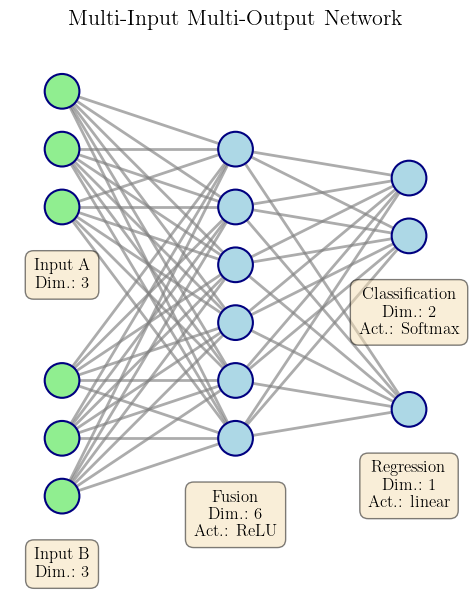

In [3]:
# Create a network with both multi-input and multi-output
multi_in_multi_out_nn = NeuralNetwork("Multi-Input Multi-Output Network")

# Two separate input streams using VectorInput (automatically treated as root layers)
input1_id = multi_in_multi_out_nn.add_layer(VectorInput(num_features=3, name="Input A"))
input2_id = multi_in_multi_out_nn.add_layer(VectorInput(num_features=3, name="Input B"))

# Fusion layer receiving from both inputs
fusion_id = multi_in_multi_out_nn.add_layer(
    FullyConnectedLayer(num_neurons=6, activation="relu", name="Fusion"), 
    parent_ids=[input1_id, input2_id]  # Multiple parents!
)

# Two output heads branching from the fusion layer (multi-output)
output1_id = multi_in_multi_out_nn.add_layer(
    FullyConnectedLayer(num_neurons=2, activation="softmax", name="Classification"), 
    parent_ids=[fusion_id]
)
output2_id = multi_in_multi_out_nn.add_layer(
    FullyConnectedLayer(num_neurons=1, activation="linear", name="Regression"), 
    parent_ids=[fusion_id]
)

fig = plot_network(
    multi_in_multi_out_nn, 
    title="Multi-Input Multi-Output Network",
    config=PlotConfig(figsize=(12, 6), show_layer_names=True, layer_names_show_activation=True),
    show=True
)

---

## Step 4: Layer-Specific Styling

Each layer can have its own visual style using `LayerStyle`. This includes custom colors for neurons and connections, boxes around layers, and more. Here we style the multi-output network from Step 3.

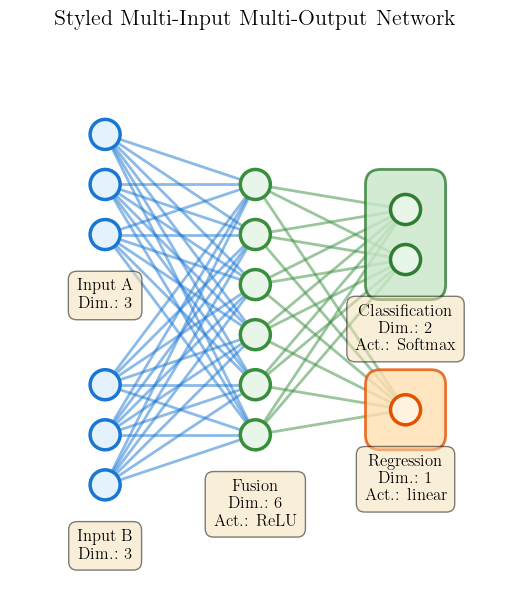

In [4]:
# Define custom styles for each layer in the multi-input multi-output network
mimo_styles = {
    "Input A": LayerStyle(
        neuron_fill_color="#E3F2FD",  # Light blue
        neuron_edge_color="#1976D2",   # Blue
        neuron_edge_width=2.5,
        connection_color="#1976D2",
        connection_alpha=0.5
    ),
    "Input B": LayerStyle(
        neuron_fill_color="#E3F2FD",  # Light blue
        neuron_edge_color="#1976D2",   # Blue
        neuron_edge_width=2.5,
        connection_color="#1976D2",
        connection_alpha=0.5
    ),
    "Fusion": LayerStyle(
        neuron_fill_color="#E8F5E9",  # Light green
        neuron_edge_color="#388E3C",   # Green
        neuron_edge_width=2.5,
        connection_color="#388E3C",
        connection_alpha=0.5
    ),
    "Classification": LayerStyle(
        neuron_fill_color="#E8F5E9",
        neuron_edge_color="#2E7D32",
        neuron_edge_width=2.5,
        box_around_layer=True,        # Draw a box around this layer
        box_fill_color="#C8E6C9",
        box_edge_color="#2E7D32",
        box_edge_width=2.0,
        box_padding=0.5,
        box_corner_radius=0.3
    ),
    "Regression": LayerStyle(
        neuron_fill_color="#FFF3E0",
        neuron_edge_color="#E65100",
        neuron_edge_width=2.5,
        box_around_layer=True,
        box_fill_color="#FFE0B2",
        box_edge_color="#E65100",
        box_edge_width=2.0,
        box_padding=0.5,
        box_corner_radius=0.3
    )
}

styled_config = PlotConfig(
    figsize=(12, 6),
    layer_styles=mimo_styles,
    show_layer_names=True,
    layer_names_show_dim=True,
    layer_names_show_activation=True
)

fig = plot_network(multi_in_multi_out_nn, title="Styled Multi-Input Multi-Output Network", config=styled_config, show=True)

---

## Step 5: Complete Labeling Configuration

This section demonstrates all labeling features on an autoencoder architecture:
- **Neuron labels**: LaTeX labels on individual neurons (input, latent, output)
- **Layer name labels**: Configurable labels below each layer with toggleable components:
  - `layer_names_show_dim=True/False` — show/hide neuron count
  - `layer_names_show_activation=True/False` — show/hide activation function
  - `layer_names_show_type=True/False` — show/hide layer type (e.g., "FullyConnected")
- **Layer group brackets**: Curly braces to group related layers (Encoder, Decoder)
- **Variable name labels**: High-level descriptions for key layers
- **Layer collapsing**: Automatic ellipsis notation for large layers

In [5]:
# Create an autoencoder network for dimensionality reduction
autoencoder = NeuralNetwork("Autoencoder for Dimensionality Reduction")

# Input layer with LaTeX labels using VectorInput
input_id = autoencoder.add_layer(VectorInput(
    num_features=256,
    name="Input Layer",
    neuron_labels=[f"$x_{{{i}}}$" for i in range(256, 0, -1)],
    label_position="left"
))

# Encoder layers
enc1_id = autoencoder.add_layer(FullyConnectedLayer(
    num_neurons=128, activation="relu", name="Encoder 1"
), parent_ids=[input_id])

enc2_id = autoencoder.add_layer(FullyConnectedLayer(
    num_neurons=4, activation="relu", name="Encoder 2"
), parent_ids=[enc1_id])

# Latent space (bottleneck) with labeled neurons
latent_id = autoencoder.add_layer(FullyConnectedLayer(
    num_neurons=2,
    activation="linear",
    name="Latent Space",
    neuron_labels=[r"$z_2$", r"$z_1$"],
    label_position="right"
), parent_ids=[enc2_id])

# Decoder layers
dec1_id = autoencoder.add_layer(FullyConnectedLayer(
    num_neurons=4, activation="relu", name="Decoder 1"
), parent_ids=[latent_id])

dec2_id = autoencoder.add_layer(FullyConnectedLayer(
    num_neurons=128, activation="relu", name="Decoder 2"
), parent_ids=[dec1_id])

# Output layer with LaTeX labels
output_id = autoencoder.add_layer(FullyConnectedLayer(
    num_neurons=256,
    activation="sigmoid",
    name="Output Layer",
    neuron_labels=[r"$\hat{x}_{" + str(i) + "}$" for i in range(256, 0, -1)],
    label_position="right"
), parent_ids=[dec2_id])

print("✓ Autoencoder network created")

✓ Autoencoder network created


In [6]:
# Define comprehensive layer styles
autoencoder_styles = {
    'Input Layer': LayerStyle(
        neuron_fill_color='#E8F4F8',
        neuron_edge_color='#1976D2',
        neuron_edge_width=2.5,
        box_around_layer=True,
        box_fill_color='#E3F2FD',
        box_edge_color='#1976D2',
        box_edge_width=2.5,
        box_padding=0.6,
        box_corner_radius=0.4,
        box_include_neuron_labels=True,
        max_neurons_to_plot=10,
        collapse_neurons_start=4,
        collapse_neurons_end=4,
        layer_name_bold=True,
        variable_name_color='#E3F2FD'
    ),
    'Encoder 1': LayerStyle(
        neuron_fill_color='#E8F4F8',
        neuron_edge_color='#1976D2',
        max_neurons_to_plot=10,
        collapse_neurons_start=3,
        collapse_neurons_end=3,
        layer_name_bold=True
    ),
    'Encoder 2': LayerStyle(
        neuron_fill_color='#E8F4F8',
        neuron_edge_color='#1976D2',
        max_neurons_to_plot=10,
        collapse_neurons_start=2,
        collapse_neurons_end=2,
        layer_name_bold=True
    ),
    'Latent Space': LayerStyle(
        neuron_fill_color='#FFF3E0',
        neuron_edge_color='#F57C00',
        neuron_edge_width=3.0,
        layer_name_bold=True,
        variable_name_color='#FFF3E0'
    ),
    'Decoder 1': LayerStyle(
        neuron_fill_color='#FFEBEE',
        neuron_edge_color='#D32F2F',
        max_neurons_to_plot=10,
        collapse_neurons_start=2,
        collapse_neurons_end=2,
        layer_name_bold=True
    ),
    'Decoder 2': LayerStyle(
        neuron_fill_color='#FFEBEE',
        neuron_edge_color='#D32F2F',
        max_neurons_to_plot=10,
        collapse_neurons_start=3,
        collapse_neurons_end=3,
        layer_name_bold=True
    ),
    'Output Layer': LayerStyle(
        neuron_fill_color='#FCE4EC',
        neuron_edge_color='#C2185B',
        neuron_edge_width=2.5,
        box_around_layer=True,
        box_fill_color='#F8BBD0',
        box_edge_color='#C2185B',
        box_edge_width=2.5,
        box_padding=0.6,
        box_corner_radius=0.4,
        box_include_neuron_labels=True,
        max_neurons_to_plot=10,
        collapse_neurons_start=4,
        collapse_neurons_end=4,
        layer_name_bold=True,
        variable_name_color='#F8BBD0'
    )
}

# Define layer groups with curly brackets
autoencoder_groups = [
    LayerGroup(
        layer_ids=['Input Layer', 'Encoder 1', 'Encoder 2'],
        label='Encoder Network',
        bracket_style='curly',
        bracket_color='#1976D2',
        bracket_linewidth=2.5,
        bracket_height=0.4,
        label_fontsize=16,
        label_color='#1976D2',
        y_offset=-2.0
    ),
    LayerGroup(
        layer_ids=['Decoder 1', 'Decoder 2', 'Output Layer'],
        label='Decoder Network',
        bracket_style='curly',
        bracket_color='#D32F2F',
        bracket_linewidth=2.5,
        bracket_height=0.4,
        label_fontsize=16,
        label_color='#D32F2F',
        y_offset=-2.0
    )
]

print("✓ Layer styles and groups configured")

✓ Layer styles and groups configured


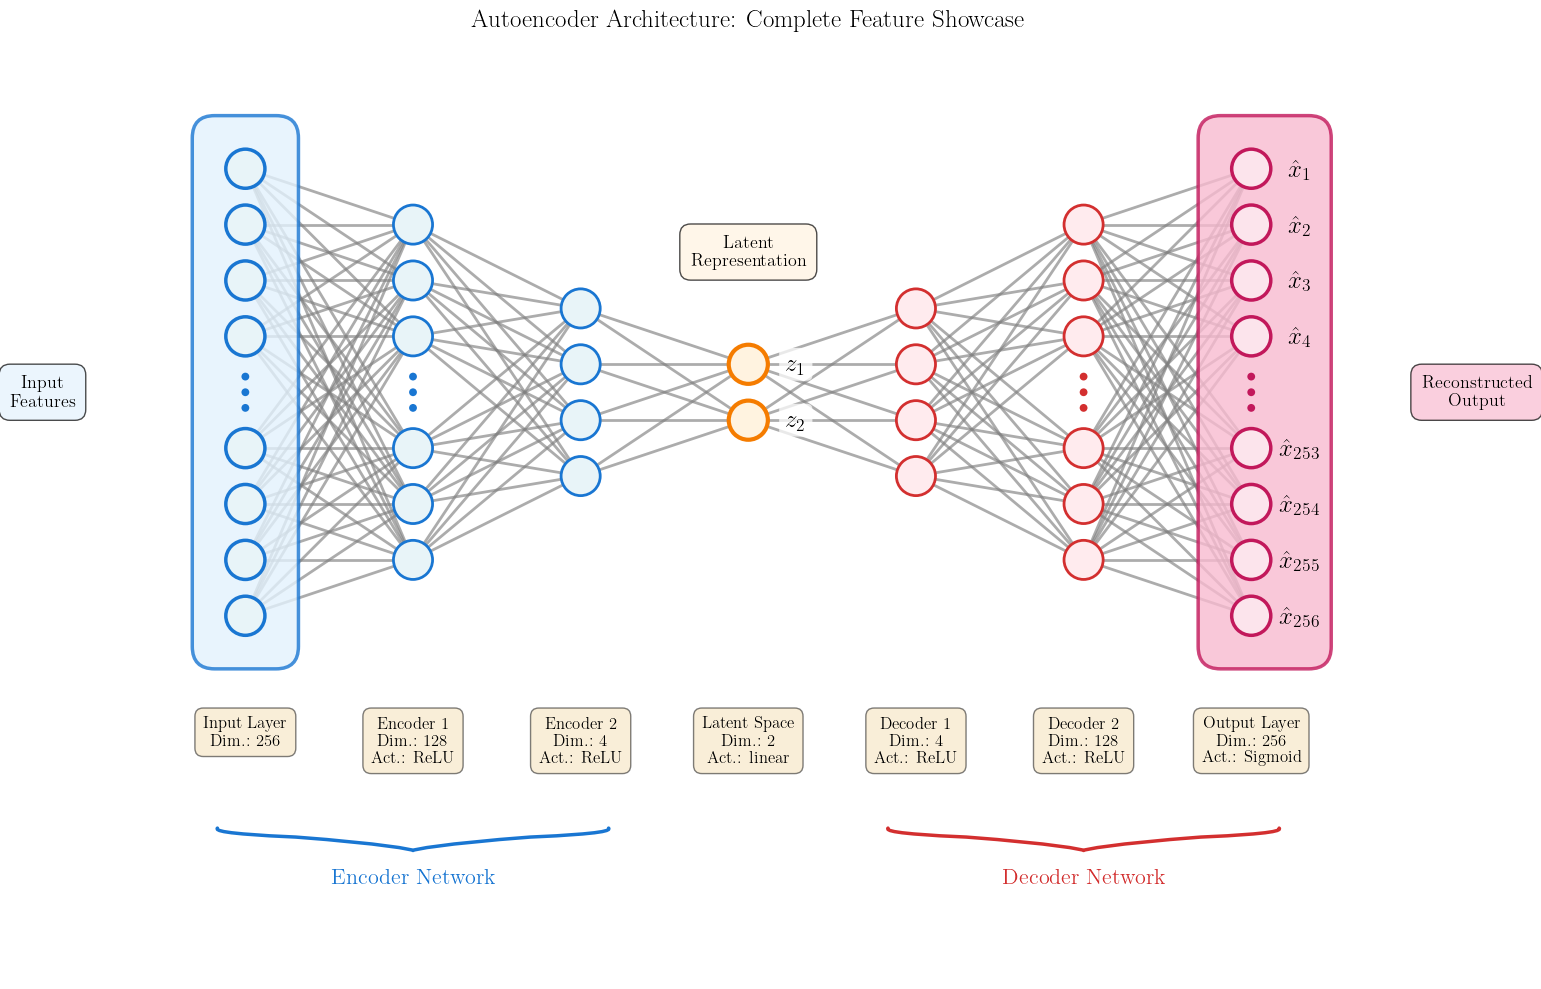

In [7]:
# Create the comprehensive labeling configuration
label_config = PlotConfig(
    # Figure settings
    figsize=(16, 10),
    background_color='white',
    
    # Neuron appearance
    neuron_radius=0.35,
    neuron_edge_width=2.0,
    
    # Neuron text labels
    show_neuron_text_labels=True,
    neuron_text_label_fontsize=18,
    neuron_text_label_offset=0.85,
    
    # Connections
    connection_alpha=0.65,
    connection_color='gray',
    connection_linewidth=2.0,
    
    # Neuron collapse settings
    max_neurons_per_layer=10,
    collapse_neurons_start=4,
    collapse_neurons_end=4,
    
    # Layer names (below each layer)
    # Toggle these to show/hide specific information:
    show_layer_names=True,
    layer_name_fontsize=12,
    layer_names_show_type=False,        # Hide layer type (e.g., "FullyConnected")
    layer_names_show_dim=True,          # Show neuron count (e.g., "256")
    layer_names_show_activation=True,   # Show activation (e.g., "relu")
    layer_names_align_bottom=True,
    layer_names_bottom_offset=1.8,
    
    # Layer variable names (high-level descriptions)
    show_layer_variable_names=True,
    layer_variable_names={
        'Input Layer': 'Input\nFeatures',
        'Latent Space': 'Latent\nRepresentation',
        'Output Layer': 'Reconstructed\nOutput'
    },
    layer_variable_names_fontsize=13,
    layer_variable_names_position='side',
    layer_variable_names_multialignment='center',
    layer_variable_names_offset=1.2,
    
    # Title
    title_fontsize=18,
    
    # Layer-specific styling
    layer_styles=autoencoder_styles,
    
    # Layer group brackets
    layer_groups=autoencoder_groups,
    
    # Font
    font_family='Times New Roman'
)

# Generate the plot
fig = plot_network(
    autoencoder,
    config=label_config,
    title="Autoencoder Architecture: Complete Feature Showcase",
    show=True
)

---

## Step 6: MLP-Specific Customization

For Multi-Layer Perceptrons (MLPs) with many neurons, you can customize how large layers are collapsed with ellipsis notation. This keeps visualizations readable while preserving the network structure.

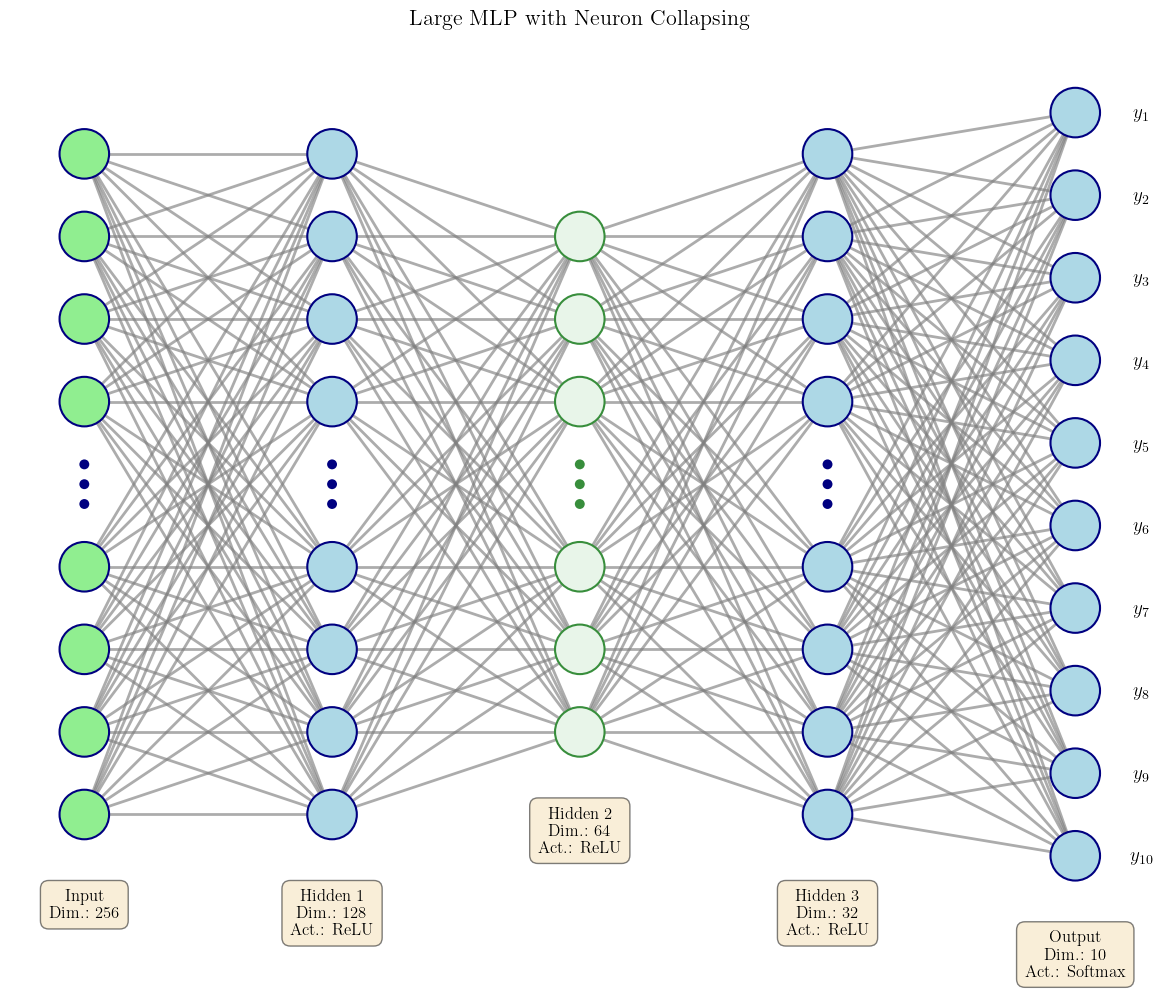

In [8]:
# Create a large MLP network
large_mlp = NeuralNetwork("Large MLP")

large_mlp.add_layer(VectorInput(
    num_features=256, 
    name="Input",
    neuron_labels=[f"$x_{{{i}}}$" for i in range(256, 0, -1)],
    label_position="left"
))
large_mlp.add_layer(FullyConnectedLayer(num_neurons=128, activation="relu", name="Hidden 1"))
large_mlp.add_layer(FullyConnectedLayer(num_neurons=64, activation="relu", name="Hidden 2"))
large_mlp.add_layer(FullyConnectedLayer(num_neurons=32, activation="relu", name="Hidden 3"))
large_mlp.add_layer(FullyConnectedLayer(
    num_neurons=10, 
    activation="softmax", 
    name="Output",
    neuron_labels=[f"$y_{{{i}}}$" for i in range(10, 0, -1)],
    label_position="right"
))

# Configure collapsing behavior
mlp_config = PlotConfig(
    figsize=(16, 10),
    
    # Global collapsing settings
    max_neurons_per_layer=10,      # Maximum neurons before collapsing
    collapse_neurons_start=4,       # Show first N neurons
    collapse_neurons_end=4,         # Show last N neurons
    
    # Per-layer collapsing overrides via LayerStyle
    layer_styles={
        "Hidden 2": LayerStyle(
            max_neurons_to_plot=8,
            collapse_neurons_start=3,
            collapse_neurons_end=3,
            neuron_fill_color="#E8F5E9",
            neuron_edge_color="#388E3C"
        )
    },
    
    # Show neuron labels on input/output
    show_neuron_text_labels=True,
    neuron_text_label_fontsize=14,
    
    # Layer names
    show_layer_names=True,
    layer_names_show_dim=True,
    layer_names_show_activation=True
)

fig = plot_network(large_mlp, title="Large MLP with Neuron Collapsing", config=mlp_config, show=True)

---

## Step 7: CNN-Specific Customization

> ⚠️ **Work in Progress**: CNN layer visualization is under development. Future versions will include:
> - Convolutional layer representations with kernel visualization
> - Pooling layer indicators
> - Feature map dimensions
> - Filter count display

In [9]:
# Placeholder for CNN visualization
print("🚧 CNN visualization coming soon!")
print("   Planned features:")
print("   - Conv2D layers with kernel size display")
print("   - MaxPooling/AvgPooling layers")
print("   - Feature map dimensions (H×W×C)")
print("   - Stride and padding indicators")

🚧 CNN visualization coming soon!
   Planned features:
   - Conv2D layers with kernel size display
   - MaxPooling/AvgPooling layers
   - Feature map dimensions (H×W×C)
   - Stride and padding indicators


---

## Step 8: Recurrent Network Customization

> ⚠️ **Work in Progress**: Recurrent network visualization is under development. Future versions will include:
> - LSTM/GRU cell representations
> - Recurrent connection arrows
> - Sequence unrolling visualization
> - Hidden state indicators

In [10]:
# Placeholder for RNN visualization
print("🚧 Recurrent network visualization coming soon!")
print("   Planned features:")
print("   - LSTM cells with gate indicators")
print("   - GRU cells")
print("   - Bidirectional RNN arrows")
print("   - Sequence length annotations")

🚧 Recurrent network visualization coming soon!
   Planned features:
   - LSTM cells with gate indicators
   - GRU cells
   - Bidirectional RNN arrows
   - Sequence length annotations


---

## Saving Your Visualization

You can save your plots in multiple formats (PNG, SVG, PDF) with custom DPI settings.

✓ Saved: showcase_outputs/autoencoder_labeling.png


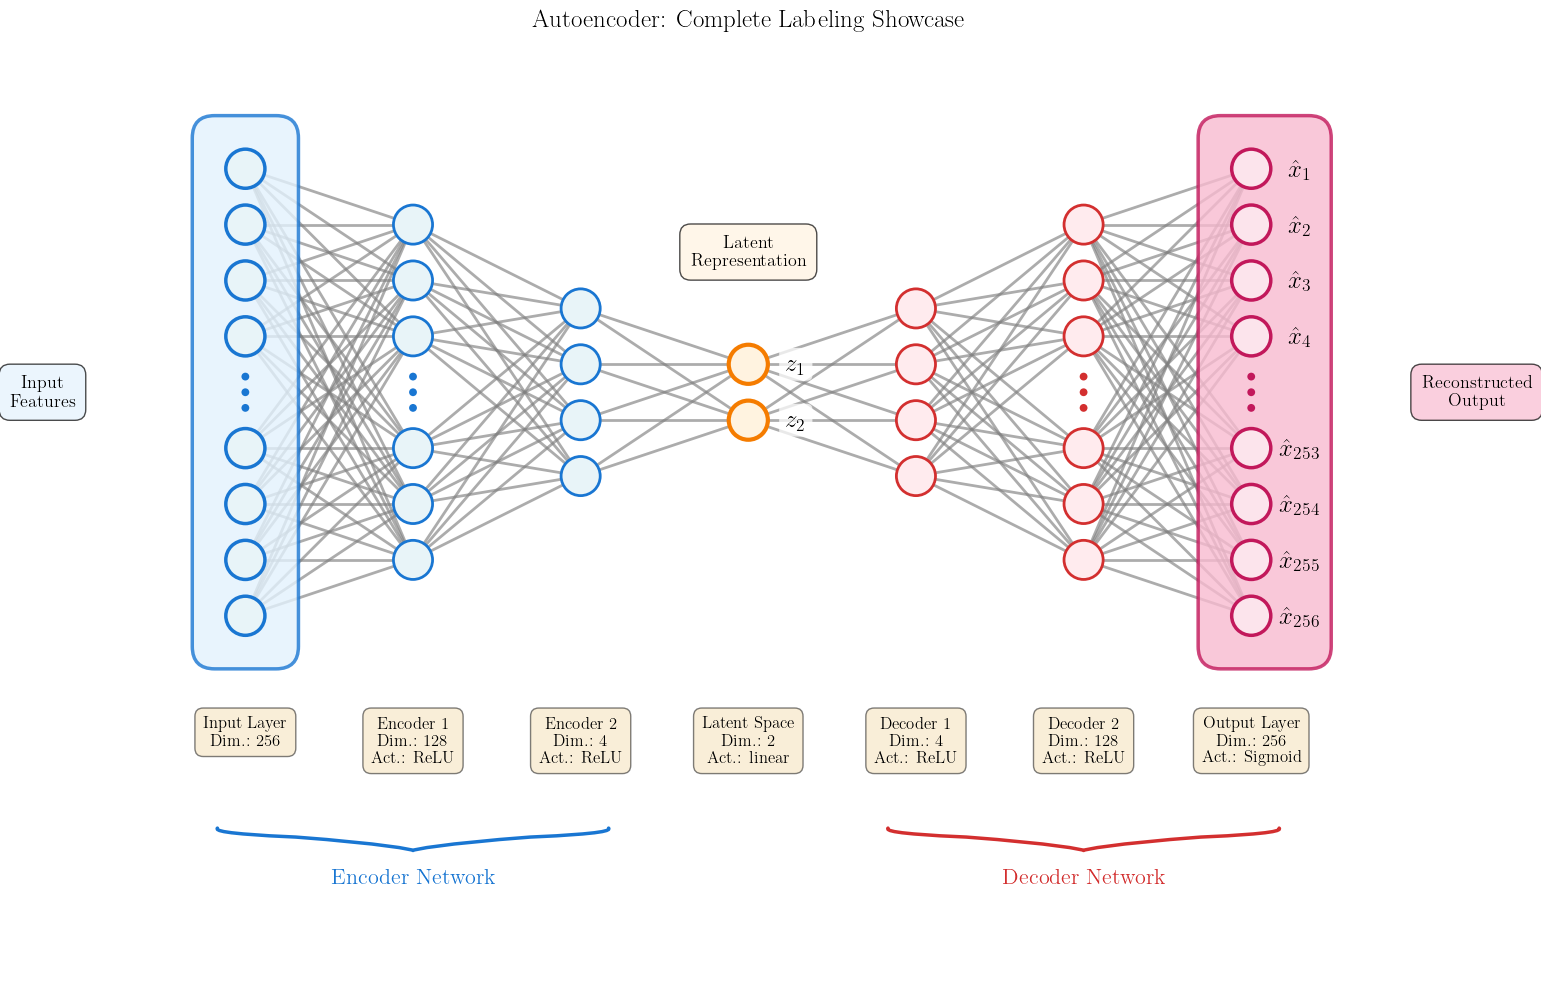

In [11]:
# Create output directory
os.makedirs("showcase_outputs", exist_ok=True)

# Save as PNG with high DPI
plot_network(
    autoencoder,
    config=label_config,
    title="Autoencoder: Complete Labeling Showcase",
    save_path="showcase_outputs/autoencoder_labeling.png",
    show=False,
    dpi=300
)
print("✓ Saved: showcase_outputs/autoencoder_labeling.png")

---

## Summary of Features Demonstrated

| Step | Feature | Description |
|------|---------|-------------|
| **Step 2** | Basic Network Creation | Creating `NeuralNetwork` and `FullyConnectedLayer` objects |
| **Step 3** | Multi-Input/Output Networks | Using `parent_ids` for multi-head, multi-input, and skip connections |
| **Step 4** | Layer-Specific Styling | Custom colors, boxes, and connections via `LayerStyle` |
| **Step 5** | Complete Labeling | Neuron labels (LaTeX), layer labels, group brackets, variable names |
| **Step 6** | MLP Customization | Neuron collapsing for large layers with ellipsis notation |
| **Step 7** | CNN Customization | 🚧 Work in progress |
| **Step 8** | RNN Customization | 🚧 Work in progress |

### Key Components

- **`NeuralNetwork`**: Container for network architecture
- **`FullyConnectedLayer`**: Layer with neurons, activation, and optional labels
- **`PlotConfig`**: Configuration for all visualization options
- **`LayerStyle`**: Per-layer styling (colors, boxes, collapsing)
- **`LayerGroup`**: Bracket grouping for related layers

### Configuration Reference

```python
PlotConfig(
    figsize=(width, height),           # Figure dimensions
    show_neuron_text_labels=True,      # Show LaTeX labels on neurons
    show_layer_names=True,             # Show layer info below
    show_layer_variable_names=True,    # Show high-level descriptions
    layer_styles={...},                # Per-layer styling
    layer_groups=[...],                # Bracket grouping
    max_neurons_per_layer=8,           # When to collapse
    font_family='Times New Roman'      # Font choice
)
```

For more details, explore the docstrings in `NN_PLOTTING_UTILITIES.py`.

---

## License

This project is licensed under the MIT License - see the LICENSE file for details.

## Contributing

Contributions are welcome! Please feel free to submit a Pull Request.

---

## Auto-Generate README.md

Run the cell below to automatically convert this notebook to README.md. This uses `nbconvert` to export the notebook as Markdown and processes it for GitHub compatibility.

In [12]:
import subprocess
import shutil
import re
from pathlib import Path

def generate_readme_from_notebook():
    """
    Convert this notebook to README.md using nbconvert.
    This creates GitHub-compatible markdown with properly embedded images.
    
    IMPORTANT: 
    1. Run all notebook cells first to generate outputs
    2. Save the notebook (Ctrl+S)
    3. Run this cell to generate README.md
    """
    notebook_path = "README_SHOWCASE.ipynb"
    
    # Check if nbconvert is installed, install if not
    try:
        subprocess.run(["jupyter", "nbconvert", "--version"], 
                      capture_output=True, check=True)
        print("✓ nbconvert is available")
    except (subprocess.CalledProcessError, FileNotFoundError):
        print("Installing nbconvert...")
        subprocess.run(["pip", "install", "nbconvert"], check=True)
        print("✓ nbconvert installed")
    
    # Convert notebook to markdown
    print("Converting notebook to markdown...")
    result = subprocess.run([
        "jupyter", "nbconvert",
        "--to", "markdown",
        "--output", "README",
        notebook_path
    ], capture_output=True, text=True)
    
    if result.returncode != 0:
        print(f"Error: {result.stderr}")
        return
    
    print("✓ Converted to README.md")
    
    # Rename the images folder
    old_images_dir = Path("README_files")
    new_images_dir = Path("readme_images")
    
    if old_images_dir.exists():
        # Remove old images dir if exists
        if new_images_dir.exists():
            shutil.rmtree(new_images_dir)
        old_images_dir.rename(new_images_dir)
        print(f"✓ Renamed {old_images_dir} → {new_images_dir}")
    
    # Read and clean up the README.md
    with open("README.md", "r", encoding="utf-8") as f:
        content = f.read()
    
    # Update image paths
    content = content.replace("README_files/", "readme_images/")
    
    # Remove the "Auto-Generate README.md" section and everything after
    content = re.sub(
        r'\n---\n\n## Auto-Generate README\.md.*',
        '',
        content,
        flags=re.DOTALL
    )
    
    # Remove stdout output blocks (like "✓ All modules imported successfully!")
    content = re.sub(r'\n\s+✓[^\n]*\n', '\n', content)
    
    # Clean up extra newlines
    content = re.sub(r'\n{3,}', '\n\n', content)
    
    # Write cleaned README
    with open("README.md", "w", encoding="utf-8") as f:
        f.write(content.strip() + "\n")
    
    print("✓ Cleaned up README.md")
    
    # List generated images
    if new_images_dir.exists():
        images = list(new_images_dir.glob("*.png"))
        print(f"✓ Generated {len(images)} images in {new_images_dir}/")
        for img in images:
            print(f"   - {img.name}")
    
    print("\n✅ README.md generated successfully!")
    print("   Commit and push to see it on GitHub.")

# Run the conversion
generate_readme_from_notebook()

✓ nbconvert is available
Converting notebook to markdown...
✓ Converted to README.md
✓ Renamed README_files → readme_images
✓ Cleaned up README.md
✓ Generated 6 images in readme_images/
   - README_10_0.png
   - README_14_0.png
   - README_6_0.png
   - README_8_0.png
   - README_22_1.png
   - README_16_0.png

✅ README.md generated successfully!
   Commit and push to see it on GitHub.
